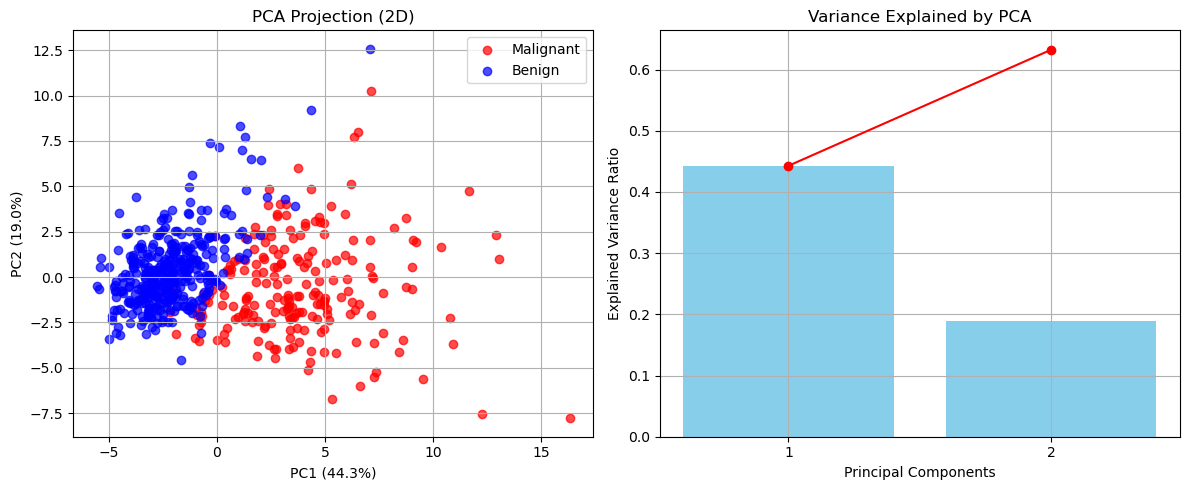

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 加载数据
data = load_breast_cancer()
X = data.data  # (569, 30)
y = data.target  # 0:恶性, 1:良性
feature_names = data.feature_names

# 标准化数据（PCA前必需步骤）# 均值0， 标准差是1. 统一尺度， x = (x-u)/std
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)

# PCA降维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  # 569 * 30 => 569 * 2

# 可视化
plt.figure(figsize=(12, 5))

# 2D散点图
plt.subplot(1, 2, 1)
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], c='red', alpha=0.7, label='Malignant')
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], c='blue', alpha=0.7, label='Benign')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('PCA Projection (2D)')
plt.legend()
plt.grid(True)

# 方差解释率
plt.subplot(1, 2, 2)
components = range(1, pca.n_components_ + 1)
plt.bar(components, pca.explained_variance_ratio_, color='skyblue')
plt.plot(components, np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Explained by PCA')
plt.xticks([1, 2])
plt.grid(True)

plt.tight_layout()
plt.show()